In [233]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from scipy import integrate

Definimos f(t)

In [234]:
t=np.arange(5,19,1) # intervalos de tiempo
tmed=((t+np.roll(t, shift=1))/2)[1:] # Punto medio para cada intervalo de tiempo

h=1/6 # valor máximo de f(t)
m1 , b1 = np.polyfit((6,14), (0,h),1)   #Ajuste de recta para f(t)
m2 , b2 = np.polyfit((14,18),(h,0), 1)  #Ajuste de recta para f(t)

#se define f(t)
def f(t):
    if t>6 and t <=14:
        return m1*t+b1
    elif t > 14 and t <18:
        return m2*t+b2
    else:
        return 0



Definimos las funciones de probabilidad y comparamos si son iguales

In [235]:
pdf=np.array([f(i+0.5) for i in t[:-1]]) # se haya el valor medio de f(t)
pdf_integral=np.array([integrate.quad(f,i,i+1)[0] for i in t[:-1]]) #se hace la integral

np.isclose(pdf,pdf_integral,1e-11)  #Se compara si los valores de ambas distribuciones son iguales o no, como son valores flotantes se tiene cierto nivel de tolerancia 


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Calculamos la funcion acumulada

In [236]:
cdf=np.cumsum(pdf) #cumsum va sumando los valores y da la suma acumulada del arreglo dado


Graficamos cdf y pdf

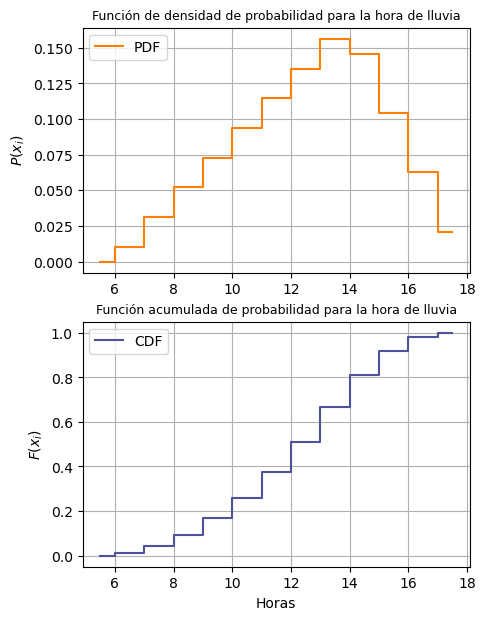

In [237]:
fig , ax = plt.subplots(2,1,figsize=(5,7)) #Graficacion


ax[0].plot(tmed,pdf ,ds='steps-mid', color="#ff8000", label=("PDF"))
ax[0].set_ylabel(r"$P(x_i)$")
ax[0].set_title("Función de densidad de probabilidad para la hora de lluvia", fontsize=9)
ax[0].grid()
ax[0].legend(loc=2)

ax[1].plot(tmed,cdf,ds='steps-mid', color="#4D529A", label=("CDF"))
ax[1].set_xlabel("Horas")
ax[1].set_ylabel(r"$F(x_i)$")
ax[1].set_title("Función acumulada de probabilidad para la hora de lluvia",fontsize=9)
ax[1].grid()
ax[1].legend()
plt.show()

## Simulación

In [238]:
rn.seed(6121)
#Función para simular la hora de lluvia
def simul(N):
    histograma=np.zeros(N)
    for i in range(N):
        r = rn.random()
        for j in np.arange(0,len(cdf)):
            if r >= cdf[j-1] and r < cdf[j]:                
                histograma[i]=tmed[j]
                break
    return histograma       #retorna lista con las horas a las que llovio cada día

N=np.array([30,365,1000,1e6])
s=[]
for n in N:
    s.append(simul(int(n)))   #simulamos para los 4 intervalos de tiempo y guardamos las listas de horas en s

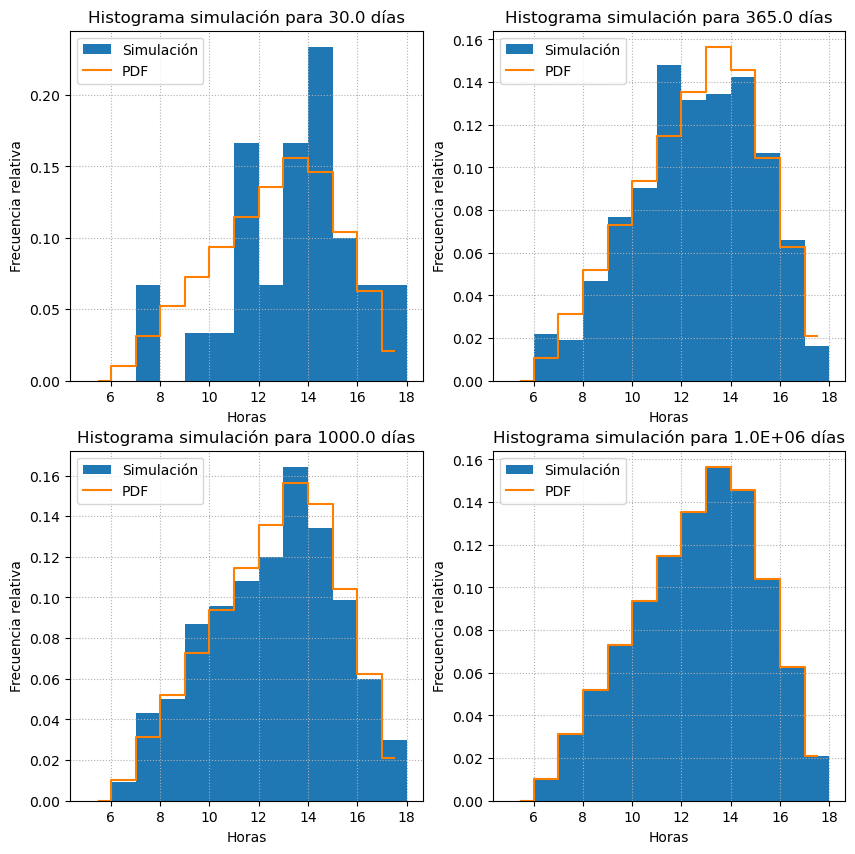

In [239]:
fig , ax = plt.subplots(2,2,figsize=(10,10))  #Graficacion

ax[0,0].hist(s[0],t,density=True,label=("Simulación"))
ax[0,0].plot(tmed,pdf ,ds='steps-mid', color="#ff8000", label=("PDF"))
ax[0,0].set_title(f"Histograma simulación para {N[0]} días")
ax[0,0].set_ylabel("Frecuencia relativa")
ax[0,0].set_xlabel("Horas")
ax[0,0].legend()
ax[0,0].grid(linestyle=':')

ax[0,1].hist(s[1],t,density=True,label=("Simulación"))
ax[0,1].plot(tmed,pdf ,ds='steps-mid', color="#ff8000", label=("PDF"))
ax[0,1].set_title(f"Histograma simulación para {N[1]} días")
ax[0,1].set_ylabel("Frecuencia relativa")
ax[0,1].set_xlabel("Horas")
ax[0,1].legend()
ax[0,1].grid(linestyle=':')

ax[1,0].hist(s[2],t,density=True,label=("Simulación"))
ax[1,0].plot(tmed,pdf ,ds='steps-mid', color="#ff8000", label=("PDF"))
ax[1,0].set_title(f"Histograma simulación para {N[2]} días")
ax[1,0].set_ylabel("Frecuencia relativa")
ax[1,0].set_xlabel("Horas")
ax[1,0].legend()
ax[1,0].grid(linestyle=':')

ax[1,1].hist(s[3],t,density=True,label=("Simulación"))
ax[1,1].plot(tmed,pdf ,ds='steps-mid', color="#ff8000", label=("PDF"))
ax[1,1].set_title(f"Histograma simulación para {N[3]:.1E} días")
ax[1,1].set_ylabel("Frecuencia relativa")
ax[1,1].set_xlabel("Horas")
ax[1,1].legend()
ax[1,1].grid(linestyle=':')

plt.show()

Agregamos el caso de la posibilidad de que no llueva

In [240]:
#función para simular con posibilidades de que no llueva
def simul2(N):    
    p=0.7  
    lluvia=0
    nolluvia=0
    histograma=np.zeros(N)
    for i in range(N):
        rndm=rn.random()
        if rndm < p:            
            r = rn.random()
            for j in np.arange(0,len(cdf)):
                if r >= cdf[j-1] and r < cdf[j]:                
                    histograma[i]=tmed[j]
                    lluvia+=1
                    break            
        else:
            nolluvia+=1
            
    return histograma, [lluvia, nolluvia,lluvia+nolluvia] #retorna lista con las horas a las que llovio cada día si llovió y días que llovio / no llovio / total de días

      

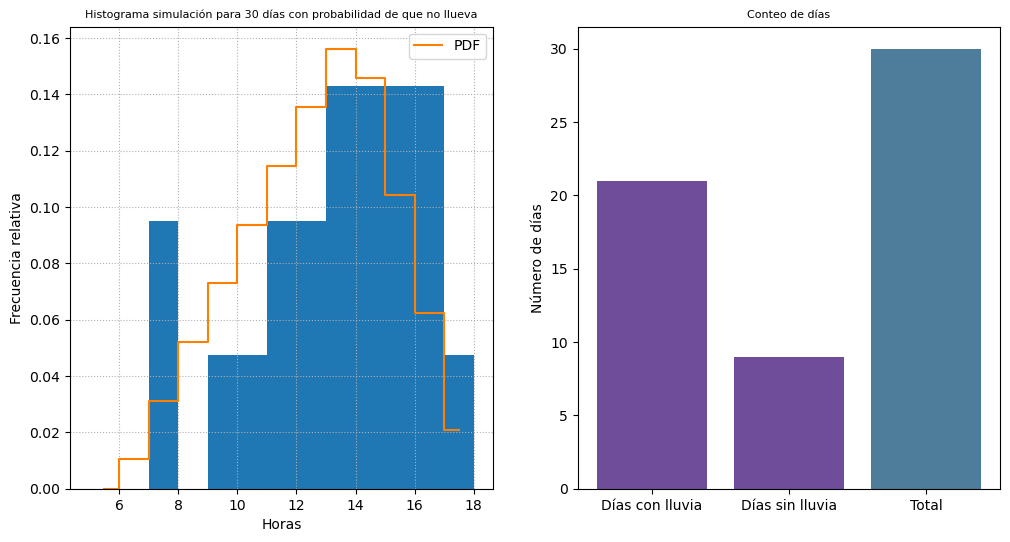

In [253]:
rn.seed(6121)
hist_30, dias_30= simul2(30) #simulacion

fig,ax =plt.subplots(1,2,figsize=(12,6)) #Graficacion

ax[0].hist(hist_30,t,density=True)
ax[0].plot(tmed,pdf ,ds='steps-mid', color="#ff8000", label=("PDF"))
ax[0].set_title(f"Histograma simulación para 30 días con probabilidad de que no llueva",fontsize=8)
ax[0].set_ylabel("Frecuencia relativa")
ax[0].set_xlabel("Horas")
ax[0].legend()
ax[0].grid(linestyle=':')

ax[1].bar(["Días con lluvia","Días sin lluvia","Total"],dias_30,color=["#704D9A","#704D9A", "#4D7D9A"])
ax[1].set_title("Conteo de días",fontsize=8)
ax[1].set_ylabel("Número de días")

plt.show()

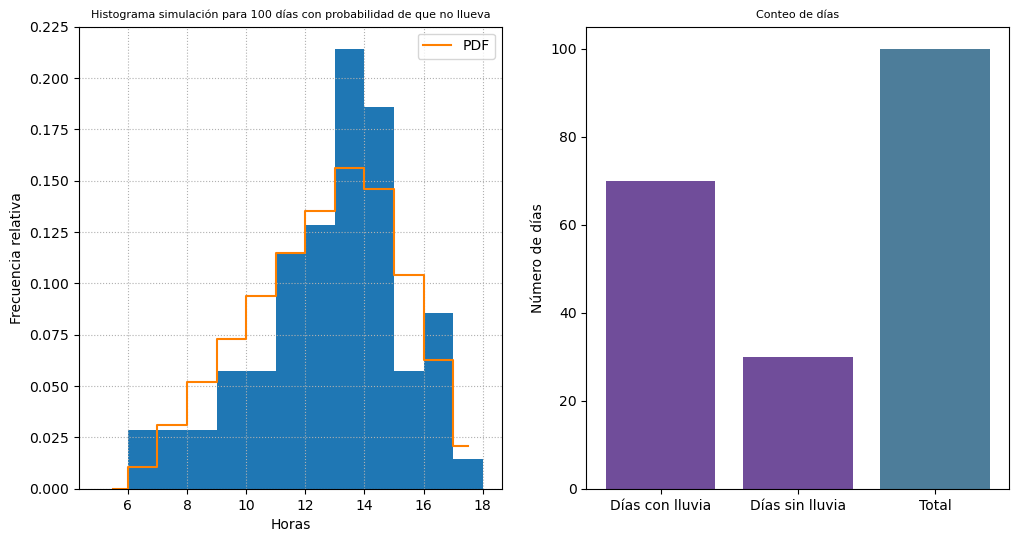

In [254]:
rn.seed(6121)
hist_100, dias_100= simul2(100) #simulacion

fig,ax =plt.subplots(1,2,figsize=(12,6)) #Graficacion

ax[0].hist(hist_100,t,density=True)
ax[0].plot(tmed,pdf ,ds='steps-mid', color="#ff8000", label=("PDF"))
ax[0].set_title(f"Histograma simulación para 100 días con probabilidad de que no llueva",fontsize=8)
ax[0].set_ylabel("Frecuencia relativa")
ax[0].set_xlabel("Horas")
ax[0].legend()
ax[0].grid(linestyle=':')

ax[1].bar(["Días con lluvia","Días sin lluvia","Total"],dias_100,color=["#704D9A","#704D9A", "#4D7D9A"])
ax[1].set_title("Conteo de días",fontsize=8)
ax[1].set_ylabel("Número de días")

plt.show()